In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn import  metrics

In [91]:
train = pd.read_csv('./train.csv')
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [92]:
test = pd.read_csv('./test.csv')
test=test.rename(columns = {0:'new_name'})
test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [93]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [94]:
y_train = train['label']
x_train = train.drop('label', axis=1)

In [95]:
x_train.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [96]:
print(x_train.shape)

print(test.shape)

(42000, 784)
(28000, 784)


Preprocessing input data

In [97]:
x_train = x_train.astype('float32')
test = test.astype('float32')
x_train = x_train/225.0
test = test/225.0
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [98]:
print(x_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


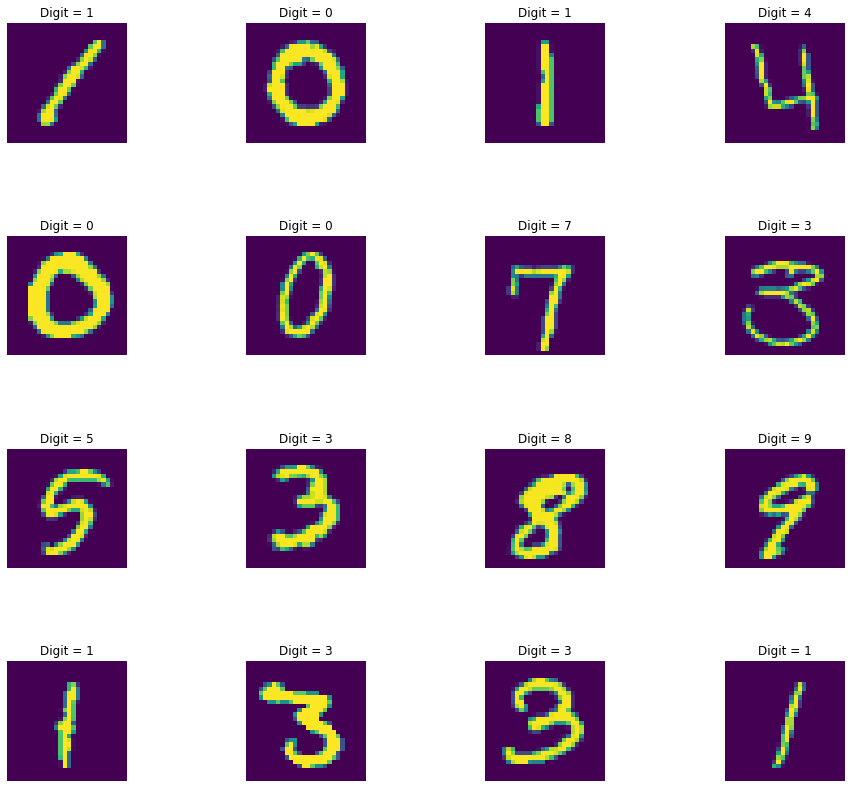

In [99]:
fig, axes = plt.subplots(4,4, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, 16):
    axes[i].imshow(x_train[i])
    axes[i].set_title("Digit = %s" % y_train[i])
    axes[i].axis("off")
    plt.subplots_adjust(wspace=1)

Preprocessing Labels

In [100]:
print(y_train.shape)

(42000,)


In [101]:
y_train[:10]

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [102]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)

In [103]:
print(y_train.shape)

(42000, 10)


Spliting Data

In [104]:
from sklearn.model_selection import train_test_split
x1, x_val, y1, y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state = 12)

In [105]:
print(x1.shape)
print(x_val.shape)
print(y1.shape)
print(y_val.shape)

(29400, 28, 28, 1)
(12600, 28, 28, 1)
(29400, 10)
(12600, 10)


Defining Model Architecture

In [106]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers import Dropout 
from keras.layers import Activation

In [107]:
model1 = Sequential()
model1.add(Conv2D(16, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform'))
model1.add(MaxPooling2D((2,2)))
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model1.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
model1.add(Dense(10, activation = 'softmax'))

Compile Model

In [108]:
model1.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Fit model on training data

In [109]:
history1 = []                
history1 = model1.fit(x1, y1, batch_size=32, epochs = 10, validation_data=(x_val, y_val),  callbacks=[history1])

Epoch 1/10
919/919 [==============================] - 16s 16ms/step - loss: 0.3924 - accuracy: 0.8775 - val_loss: 0.0688 - val_accuracy: 0.9786
Epoch 2/10
919/919 [==============================] - 15s 16ms/step - loss: 0.0703 - accuracy: 0.9784 - val_loss: 0.0574 - val_accuracy: 0.9823
Epoch 3/10
919/919 [==============================] - 15s 16ms/step - loss: 0.0409 - accuracy: 0.9877 - val_loss: 0.0581 - val_accuracy: 0.9825
Epoch 4/10
919/919 [==============================] - 14s 15ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0521 - val_accuracy: 0.9841
Epoch 5/10
919/919 [==============================] - 16s 17ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0494 - val_accuracy: 0.9858
Epoch 6/10
919/919 [==============================] - 17s 18ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0585 - val_accuracy: 0.9844
Epoch 7/10
919/919 [==============================] - 16s 18ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0615 - val_accuracy:

(28000, 28, 28, 1)

In [115]:
ytest1 = model1.predict(test)

In [122]:
y_pred = np.argmax(ytest1, axis=1)
y_pred[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

7

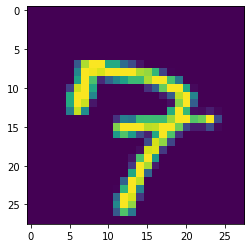

In [127]:
plt.imshow(test[5,:,:,:])
y_pred[5]

In [128]:
len(test)

28000

In [131]:
y_pred_df = pd.DataFrame({'ImageID': range(1, len(test)+1), 'Label': y_pred})


In [132]:
y_pred_train = np.argmax(model1.predict(x_train),axis=1)


In [133]:
df = pd.DataFrame()
df['y_train'] = np.argmax(y_train,axis=1)
df['y_pred'] = y_pred_train 

X = metrics.confusion_matrix(df['y_train'],df['y_pred'])



array([[4002,    0,    2,    0,   24,    1,   10,    0,    2,   91],
       [   0, 4679,    1,    0,    0,    0,    2,    1,    1,    0],
       [   0,    2, 4152,    3,    4,    0,    0,    9,    5,    2],
       [   0,    0,    8, 4312,    0,    5,    0,    6,   16,    4],
       [   0,    4,    0,    0, 4059,    0,    0,    4,    0,    5],
       [   3,    0,    0,    5,    0, 3758,   19,    0,    5,    5],
       [   1,    0,    1,    1,    6,    1, 4124,    0,    2,    1],
       [   0,    2,    8,    3,    3,    1,    0, 4376,    4,    4],
       [   1,    1,    0,    0,    3,    0,    2,    1, 4053,    2],
       [   0,    1,    0,    1,   26,    2,    0,    8,    7, 4143]])